In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [4]:
cars = pd.read_csv('car_data.csv')
cars.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
cars.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [6]:
cars.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

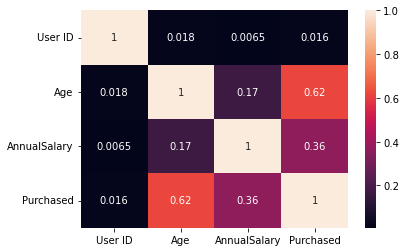

In [7]:
sns.heatmap(cars.corr(), annot=True);

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


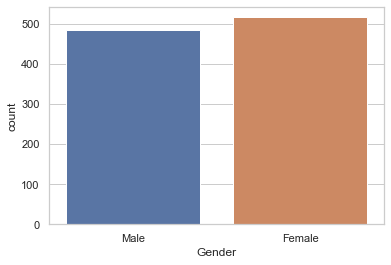

In [8]:
sns.set_theme(style='whitegrid')
sns.countplot(cars['Gender']);

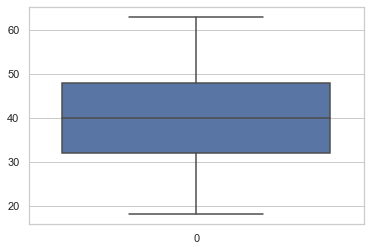

In [9]:
sns.boxplot(data=cars['Age']);

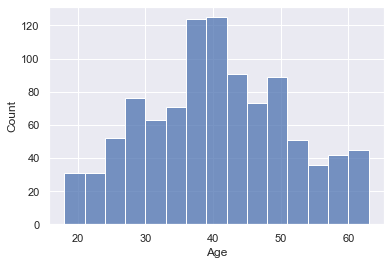

In [10]:
sns.set_theme(style='darkgrid')
sns.histplot(cars['Age']);

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


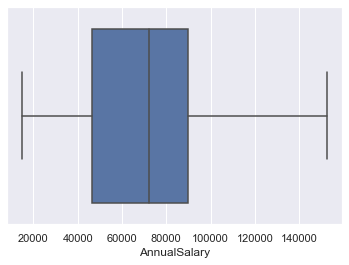

In [11]:
sns.boxplot(cars['AnnualSalary']);

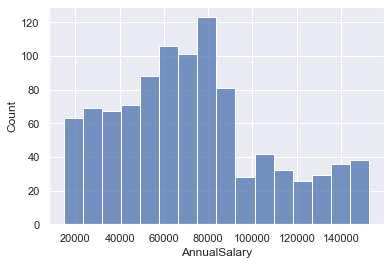

In [12]:
sns.set_theme(style='darkgrid')
sns.histplot(cars['AnnualSalary']);

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


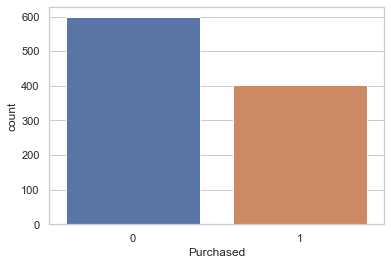

In [13]:
sns.set_theme(style='whitegrid')
sns.countplot(cars['Purchased']);

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


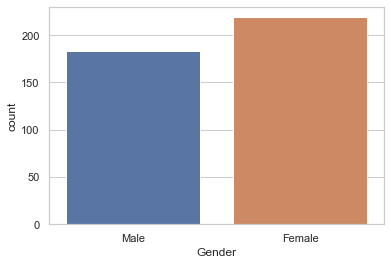

In [14]:
gender_purchased = cars[['Gender', 'Purchased']][cars['Purchased'] == 1]

sns.set_theme(style='whitegrid')
sns.countplot(gender_purchased['Gender']);

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


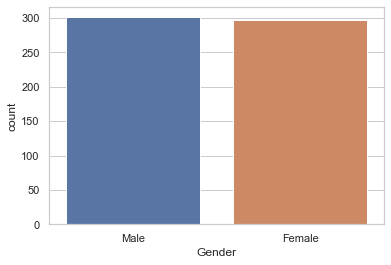

In [15]:
gender_notPurchased = cars[['Gender', 'Purchased']][cars['Purchased'] == 0]

sns.set_theme(style='whitegrid')
sns.countplot(gender_notPurchased['Gender']);

In [16]:
cars = cars.drop('User ID', axis=1)
cars.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [17]:
cars['Gender'] = cars['Gender'].map({
    'Male': 1,
    'Female': 2
})

cars.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [18]:
cars['Gender'].value_counts()

2    516
1    484
Name: Gender, dtype: int64

In [19]:
x = cars.drop('Purchased', axis=1)
y = cars['Purchased']
x.shape, y.shape

((1000, 3), (1000,))

In [20]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Gender,Age,AnnualSalary
0,0.0,0.377778,0.036364
1,0.0,0.488889,0.207273
2,0.0,0.688889,0.429091
3,0.0,0.488889,0.672727
4,0.0,0.155556,0.465455


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 3), (250, 3), (750,), (250,))

# Decision Tree

In [22]:
tree_params = {
    'max_depth': np.arange(1, 30),
    'random_state': np.arange(1, 42),
    'criterion': ['gini', 'entropy']
}

tree_randomizedSearch = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, n_iter=10, cv=5, scoring='accuracy')
tree_randomizedSearch.fit(x_train, y_train)
tree_best_params = tree_randomizedSearch.best_params_
tree_best_params

{'random_state': 37, 'max_depth': 4, 'criterion': 'entropy'}

In [23]:
clf_tree = DecisionTreeClassifier(max_depth=tree_best_params['max_depth'],
                                  random_state=tree_best_params['random_state'],
                                 criterion=tree_best_params['criterion'])

In [24]:
cross_val_tree = cross_val_score(clf_tree, x_test, y_test)
print(f'Values: {cross_val_tree * 100}')
print(f'Mean: {(cross_val_tree * 100).mean()}')

Values: [86. 86. 84. 88. 94.]
Mean: 87.6


In [25]:
clf_tree.fit(x_train, y_train)
predict_tree = clf_tree.predict(x_test)
print(classification_report(y_test, predict_tree))
print(f'Decision Tree acc: {clf_tree.score(x_test, y_test) * 100}')

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       150
           1       0.90      0.83      0.86       100

    accuracy                           0.90       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.90      0.90       250

Decision Tree acc: 89.60000000000001


In [26]:
svm_params = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': ['auto', 'scale'],
    'degree': np.arange(1, 6),
    'random_state': np.arange(1, 42)
}

svm_randomizedSearch = RandomizedSearchCV(SVC(), svm_params, n_iter=10, cv=5, scoring='accuracy')
svm_randomizedSearch.fit(x_train, y_train)
svm_best_params = svm_randomizedSearch.best_params_
svm_best_params

{'random_state': 36, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 10}

In [27]:
clf_svm = SVC(random_state=svm_best_params['random_state'],
             kernel=svm_best_params['kernel'],
             gamma=svm_best_params['gamma'],
             degree=svm_best_params['degree'],
             C=svm_best_params['C'])

In [28]:
cross_val_svm = cross_val_score(clf_svm, x_test, y_test)
print(f'Values: {cross_val_svm * 100}')
print(f'Mean: {(cross_val_svm * 100).mean()}')

Values: [78. 88. 86. 90. 90.]
Mean: 86.4


In [29]:
clf_svm.fit(x_train, y_train)
predict_svm = clf_svm.predict(x_test)
print(classification_report(predict_svm, y_test))
print(f'SVM acc: {clf_svm.score(x_test, y_test) * 100}')

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       161
           1       0.81      0.91      0.86        89

    accuracy                           0.89       250
   macro avg       0.88      0.90      0.89       250
weighted avg       0.90      0.89      0.89       250

SVM acc: 89.2


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
LReg = LogisticRegression(solver='liblinear', random_state=0)
LReg.fit(x, np.ravel(y,order='C'))
LReg.predict(x)
cars['Purchased_score'] = LReg.predict_proba(x)[:,1]
cars['Purchased_score'] = (cars['Purchased_score'] > 0.5)*1
print('Interception = ', LReg.intercept_)
print('Coeff = ', LReg.coef_)
print()
print('Confusion matrix: ')
print(confusion_matrix(cars['Purchased'],cars['Purchased_score']))
print()
print('Classification report:')
print(classification_report(cars['Purchased'],cars['Purchased_score']))

Interception =  [-5.00180886]
Coeff =  [[-0.21583381  6.57764754  3.10327732]]

Confusion matrix: 
[[542  56]
 [120 282]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       598
           1       0.83      0.70      0.76       402

    accuracy                           0.82      1000
   macro avg       0.83      0.80      0.81      1000
weighted avg       0.82      0.82      0.82      1000



# Conclusions Drawn: 
* SVM has a accuracy of 89.2
* Decision Tree has a accuracy of 89.6
* Logistic Regression Has a accuracy of 82.